In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error
from math import sqrt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Enter State Code:AZ
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=5812.242, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=5998.756, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=5877.788, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=5811.925, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=5807.711, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=5810.641, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=5801.822, Time=0.11 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=5807.968, Time=0.03 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=5804.430, Time=0.17 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=5809.760, Time=0.04 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=5797.299, Time=0.27 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=5799.101, Time=0.35 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=5799.195, Time=0.28 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=5802.363, Time=0.32 sec
 ARIMA(3,2,2)

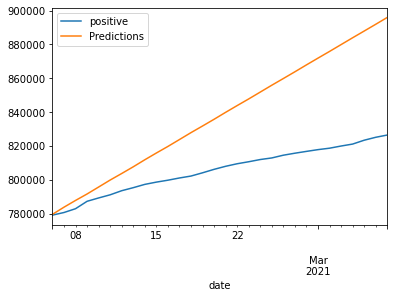

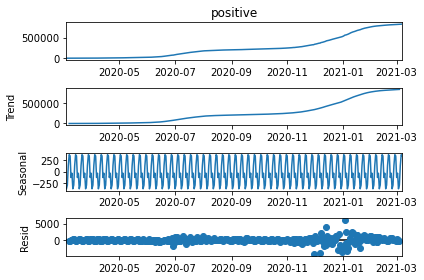

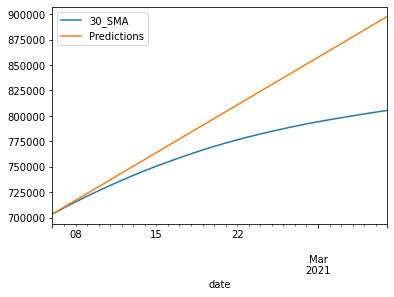

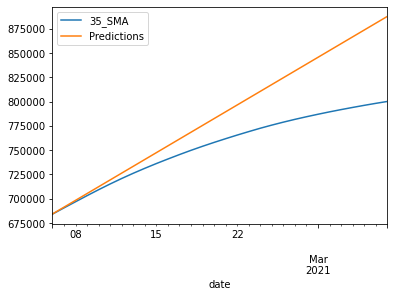

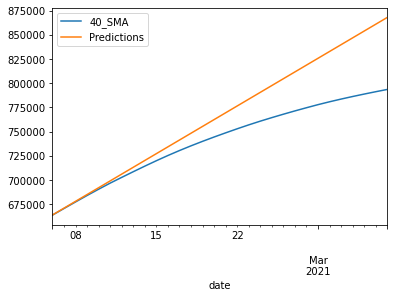

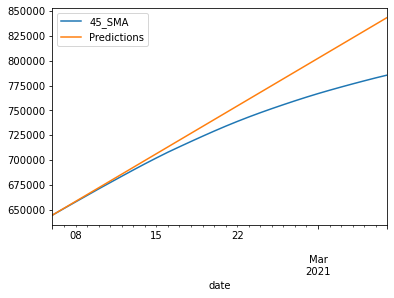

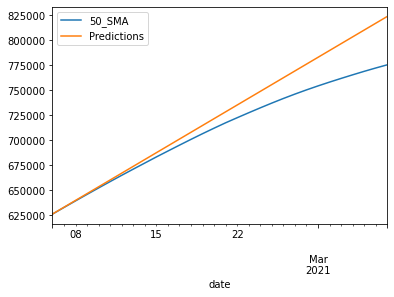

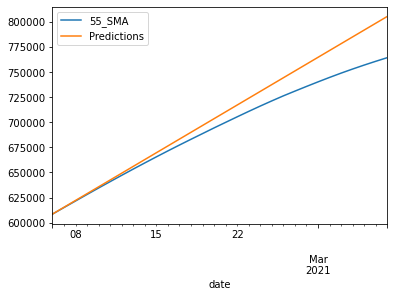

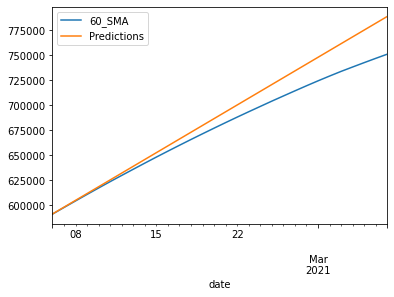

In [59]:
if __name__ == "__main__":
    user_input_state()

In [58]:
def user_input_state():
    df=pd.read_csv('all-states-history.csv',index_col='date',parse_dates=True,usecols=['date','state','positive'])
    x=input('Enter State Code:')
    y=[]
    y=[x]
    df1=df[df['state'].isin(y)]
    df1=df1[['positive']]
    df1=df1.iloc[::-1]
    df1=df1.dropna()
    auto_arima_model(df1)
    ema_models(df1)
    
    
def auto_arima_model(b):
    b_train=b[:len(b)-30]
    b_test=b[len(b)-30:]
    fit=auto_arima(b_train,trace=True,suppress_warnings=True)
    fit.summary()
    pred=fit.predict(n_periods =30)
    b_test['Predictions']=pred
    b_test.plot()
    rmse=sqrt(mean_squared_error(b_test['positive'],b_test['Predictions']))
    print('AUTO_ARIMA_RMSE=',rmse,'\n')
    
    
def ema_models(c):
    w=[30,35,40,45,50,55,60]
    result_add = seasonal_decompose(c['positive'],model = 'add')
    result_add.plot();
    for i in w:
        data=c.copy()
        data[str(i)+'_SMA'] = c['positive'].rolling(window=i).mean()
        data=data.dropna()
        data_train=data[:len(data)-30]
        data_test=data[len(data)-30:]
        model1= ExponentialSmoothing(data_train[str(i)+'_SMA'],trend='add').fit()
        predictions = model1.forecast(30)
        data_test['Predictions']= predictions
        data_test[[str(i)+'_SMA','Predictions']].plot()
        rmse=sqrt(mean_squared_error(data_test[str(i)+'_SMA'],data_test['Predictions']))
        print(str(i)+'_SMA_RMSE=',rmse,'\n')
    print('Respective Plots:\n')

30_SMA= 45559.86910248052
35_SMA= 42242.5929421688
40_SMA= 34660.25109881422
45_SMA= 25936.66847880715
50_SMA= 21257.328169018074
55_SMA= 18205.533300528594
60_SMA= 17448.172449396265


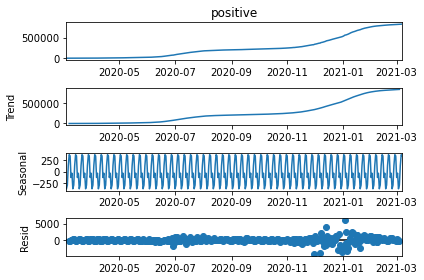

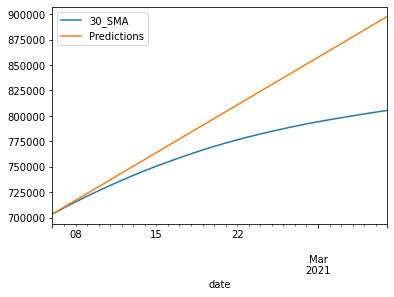

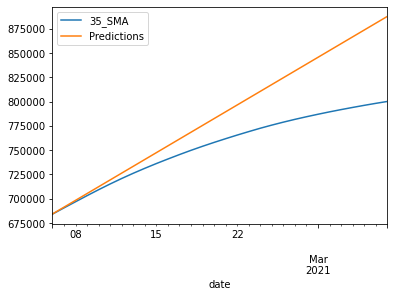

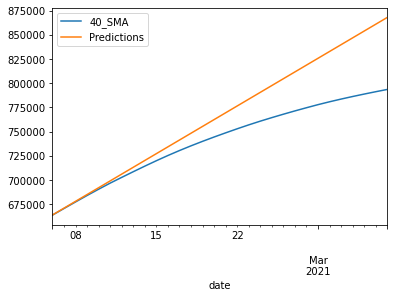

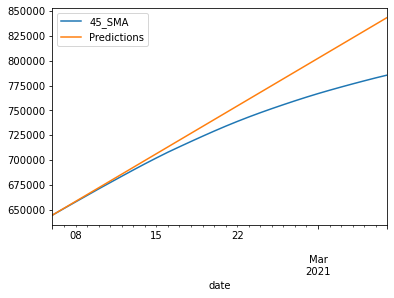

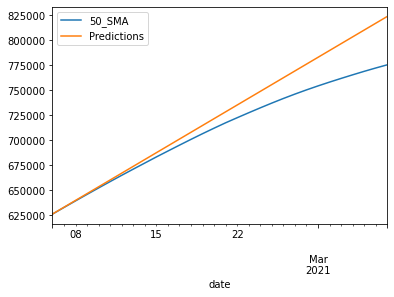

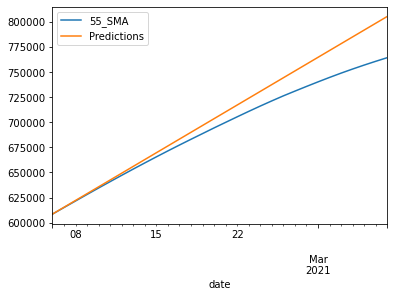

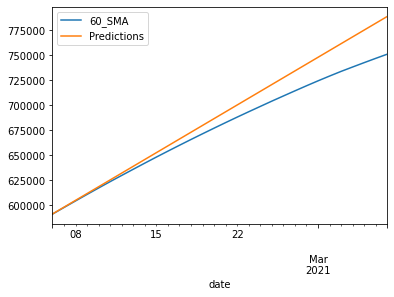

In [47]:
df=pd.read_csv('all-states-history.csv',index_col='date',parse_dates=True,usecols=['date','state','positive'])
c=df.query('state == "AZ"')
c=c.iloc[::-1]
c=c[['positive']]
w=[30,35,40,45,50,55,60]
result_add = seasonal_decompose(c['positive'],model = 'add')
result_add.plot();
for i in w:
    data=c.copy()
    data[str(i)+'_SMA'] = c['positive'].rolling(window=i).mean()
    data=data.dropna()
    data_train=data[:len(data)-30]
    data_test=data[len(data)-30:]
    model1= ExponentialSmoothing(data_train[str(i)+'_SMA'],trend='add').fit()
    predictions = model1.forecast(30)
    data_test['Predictions']= predictions
    data_test[[str(i)+'_SMA','Predictions']].plot()
    rmse=sqrt(mean_squared_error(data_test[str(i)+'_SMA'],data_test['Predictions']))
    print(str(i)+'_SMA=',rmse)

In [40]:
df=pd.read_csv('all-states-history.csv',index_col='date',parse_dates=True,usecols=['date','state','positive'])
b=df.query('state == "AK"')
b=b.iloc[::-1]
b=b[['positive']]
b=b.dropna()

,positive
date,
2020-03-17,3.0
2020-03-18,8.0
2020-03-19,11.0
2020-03-20,14.0
2020-03-21,15.0
...,...
2021-03-03,56605.0
2021-03-04,56745.0
2021-03-05,56886.0


In [44]:
df=pd.read_csv('all-states-history.csv',index_col='date',parse_dates=True,usecols=['date','state','positive'])

x=input('Enter State Code:')
print(x,type(x))
y=[]
print(y,type(y))
y=[x]
##df1=df.query('state == "AZ"')
df1=df[df['state'].isin(y)]
df1


Enter State Code:WA
WA <class 'str'>
[] <class 'list'>


,state,positive
date,,
2021-03-07,WA,344532.0
2021-03-06,WA,343868.0
2021-03-05,WA,343090.0
2021-03-04,WA,342236.0
2021-03-03,WA,341441.0
...,...,...
2020-01-17,WA,0.0
2020-01-16,WA,0.0
2020-01-15,WA,0.0
